### Homicide Data Analysis Project

In [3]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Importing and reading a dataset

df = pd.read_csv(r"C:\Data Scientist Career\Case Studies\Datasets\homicide_by_countries.csv")

df.head(5)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [5]:
df.shape

(195, 6)

In [6]:
# Identifying null values in a dataset

df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [7]:
# Checking data types

df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [8]:
north_america = [
    'United States', 'Canada', 'Mexico', 
    'Guatemala', 'Belize', 'Honduras', 
    'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama'
]

south_america = [
    'Brazil', 'Argentina', 'Colombia', 
    'Peru', 'Venezuela', 'Chile', 
    'Ecuador', 'Bolivia', 'Paraguay', 
    'Uruguay', 'Guyana', 'Suriname'
]

country_to_region = {
    **{Location: "North America" for Location in north_america},
    **{Location: "South America" for Location in south_america}
}

df["Region"] = df["Location"].map(country_to_region).fillna(df["Region"])

df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,South America,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


##### Exploratory Data Analysis

In [10]:
homicide_countries = df.sort_values(by = "Count", ascending = False).reset_index(drop = True)

homicide_countries

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,South America,South America,22.5,47722,2020
1,Nigeria,Africa,Western Africa,22.0,44200,2019
2,India,Asia,Southern Asia,3.0,40651,2020
3,Mexico,North America,Central America,28.4,36579,2020
4,United States,North America,Northern America,6.5,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0.0,0,2015
191,Channel Islands,Europe,Northern Europe,0.0,0,2010
192,Saint Helena,Africa,Western Africa,0.0,0,2009
193,San Marino,Europe,Southern Europe,0.0,0,2011


In [11]:
top_homicide_countries = homicide_countries[["Location","Count"]].head(5)
top_homicide_countries

,Location,Count
0,Brazil,47722
1,Nigeria,44200
2,India,40651
3,Mexico,36579
4,United States,21570


In [12]:
top_homicide_countries["Percentage"] = (top_homicide_countries["Count"] * 100 / top_homicide_countries["Count"].sum()).round(2)

top_homicide_countries

,Location,Count,Percentage
0,Brazil,47722,25.02
1,Nigeria,44200,23.18
2,India,40651,21.31
3,Mexico,36579,19.18
4,United States,21570,11.31


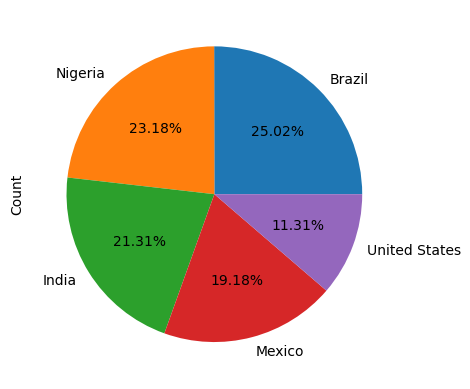

In [13]:
top_homicide_countries.plot(x = "Location", y = "Count", kind = "pie", labels = top_homicide_countries.Location, autopct = "%1.2f%%")

plt.legend().set_visible(False)

plt.show()

In [14]:
homicide_region = homicide_countries.groupby("Region")["Count"].sum().sort_values(ascending = False)
homicide_region

Region
Asia             105552
Africa            99481
South America     78842
North America     69684
Europe            19869
Americas           5071
Oceania             347
Name: Count, dtype: int64

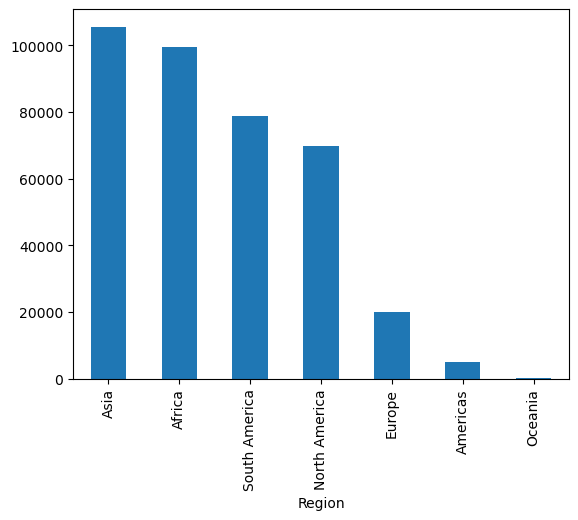

In [15]:
homicide_region.plot(kind = "bar")

plt.show()

In [16]:
homicide_subregion = homicide_countries.groupby("Subregion")["Count"].sum().sort_values(ascending = False)
homicide_subregion

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [17]:
homicide_subregion.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [18]:
homicide_subregion.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

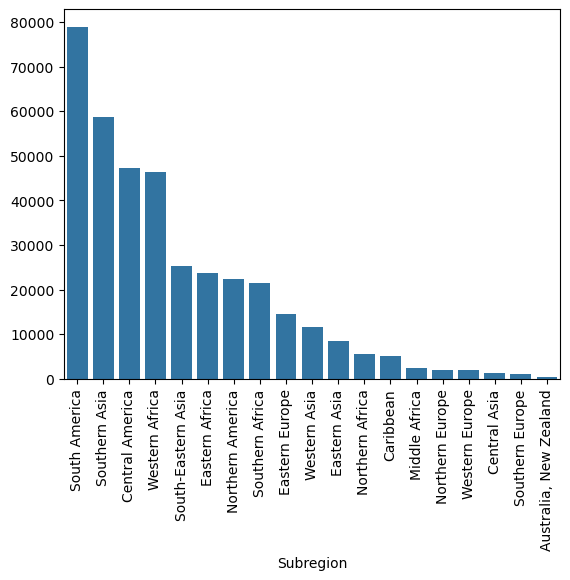

In [19]:
sns.barplot(x = homicide_subregion.index, y = homicide_subregion.values)

plt.xticks(rotation = "vertical")

xlabel = None

plt.show()

In [20]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,South America,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [21]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [27]:
europe_asia_after_2016 = df[(df["Region"].isin(["Asia","Europe"])) & (df["Year"] >= 2016)]

europe_asia_after_2016

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
178,Turkey,Asia,Western Asia,2.5,2095,2020
182,Ukraine,Europe,Eastern Europe,6.2,2751,2017
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018


In [32]:
europe_asia = europe_asia_after_2016.groupby(["Region","Year"])["Count"].sum()

europe_asia

Region  Year
Asia    2016      627
        2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2016        0
        2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [33]:
europe_asia_unstacked = europe_asia.unstack(level = 0)

europe_asia_unstacked

Region,Asia,Europe
Year,,
2016,627.0,0.0
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


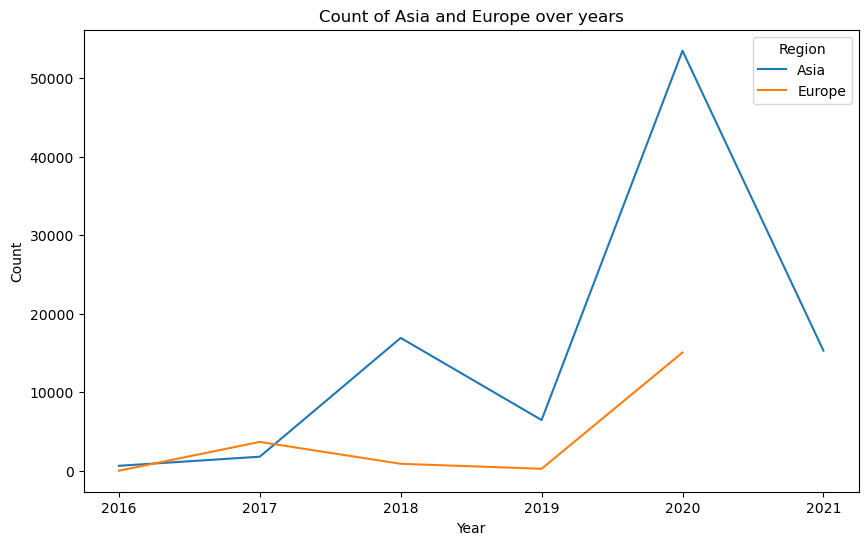

In [36]:
europe_asia_unstacked.plot(kind = "line", figsize = (10, 6))

plt.title("Count of Asia and Europe over years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()

In [41]:
homicide_by_year = homicide_countries.groupby(["Year"])["Rate"].sum().sort_values(ascending = False)

homicide_by_year

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

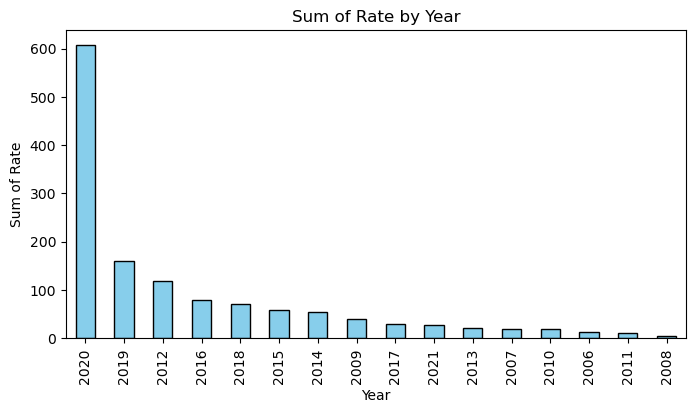

In [46]:
homicide_by_year.plot(kind = "bar", figsize = (8,4), color = "skyblue", edgecolor = "black")

plt.title("Sum of Rate by Year")
plt.xlabel("Year")
plt.ylabel("Sum of Rate")

plt.show()

In [58]:
homicide_df = homicide_countries[["Year","Region","Count"]]
homicide_df

,Year,Region,Count
0,2020,South America,47722
1,2019,Africa,44200
2,2020,Asia,40651
3,2020,North America,36579
4,2020,North America,21570
...,...,...,...
190,2015,Europe,0
191,2010,Europe,0
192,2009,Africa,0
193,2011,Europe,0


In [62]:
homicide_df.groupby(["Year","Region"])["Count"].sum().reset_index().sort_values(by = "Year", ascending = False)

,Year,Region,Count
45,2021,Asia,15299
44,2020,South America,64986
43,2020,Oceania,221
42,2020,North America,66771
41,2020,Europe,15066
40,2020,Asia,53516
39,2020,Americas,3027
38,2020,Africa,28460
34,2019,Europe,249
31,2019,Africa,44210


In [68]:
homicide_year_region = homicide_df.groupby(["Year", "Region"])["Count"].sum().sort_index(level="Year", ascending=False)
homicide_year_region

Year  Region       
2021  Asia             15299
2020  South America    64986
      Oceania            221
      North America    66771
      Europe           15066
      Asia             53516
      Americas          3027
      Africa           28460
2019  South America      806
      Oceania            126
      North America     2913
      Europe             249
      Asia              6458
      Americas           557
      Africa           44210
2018  South America    13050
      Europe             883
      Asia             16923
      Americas           743
2017  Europe            3670
      Asia              1787
      Africa            1467
2016  Europe               0
      Asia               627
      Americas           608
      Africa            4987
2015  Europe               0
      Asia               241
      Africa            2206
2014  Asia              3029
      Americas            13
2013  Asia              5782
2012  Asia                61
      Americas         

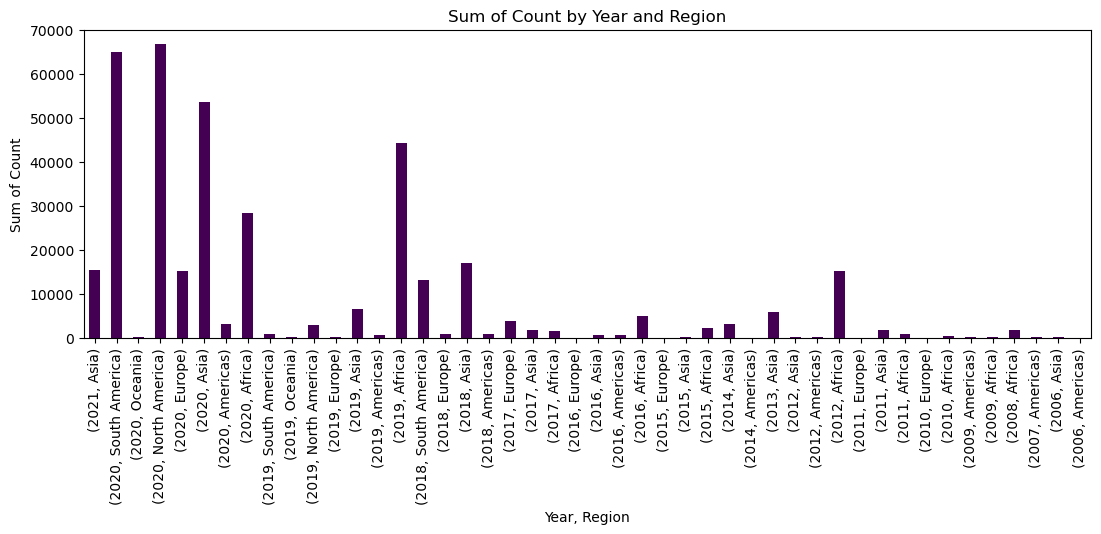

In [84]:
homicide_year_region.plot(kind = "bar", figsize = (13,4), colormap = "viridis")

plt.title("Sum of Count by Year and Region")
plt.xlabel("Year, Region")
plt.ylabel("Sum of Count")

plt.show()

In [94]:
homicide_subregion = homicide_countries.groupby("Subregion")["Count"].mean().sort_values(ascending = False).round(2)
homicide_subregion

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [96]:
homicide_subregion.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [98]:
homicide_subregion.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [112]:
data = {
    "Category": homicide_subregion.index,
    "Value": homicide_subregion.values,
    "Info": homicide_subregion.values
}

new_df = pd.DataFrame(data)

new_df

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


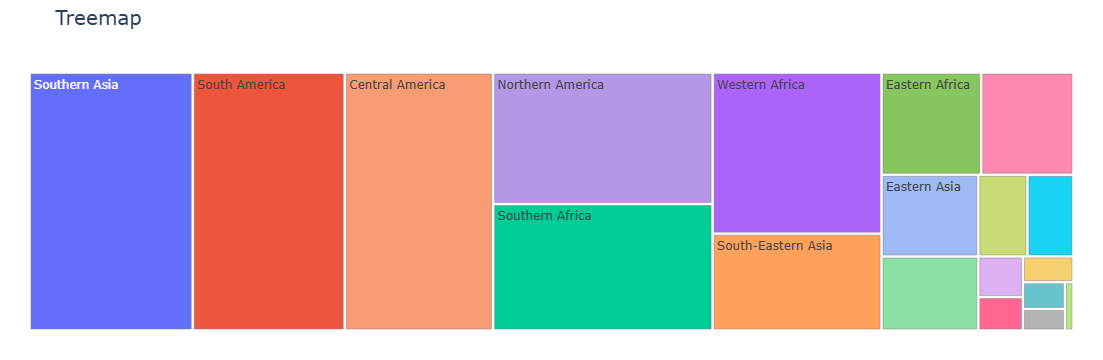

In [162]:
fig = px.treemap(new_df, path = ["Category"], values = "Value", title = "Treemap")

fig.update_traces(hovertemplate = "b>%{label}</b><br>Value: %{value:,}<br>Share: %{percentParent:.1%}",
                 marker=dict(colors=px.colors.qualitative.Pastel,  line=dict(width=0.5, color='gray')))

fig.update_layout(
    title_font_size=20,
    margin=dict(t=50, l=25, r=25, b=25),  
    uniformtext=dict(minsize=12, mode='hide'),  
)

fig.show()